# PetFinder.my Adoption Prediction
https://www.kaggle.com/c/petfinder-adoption-prediction

## Data description

### File descriptions

    train.csv - Tabular/text data for the training set
    test.csv - Tabular/text data for the test set
    sample_submission.csv - A sample submission file in the correct format
    breed_labels.csv - Contains Type, and BreedName for each BreedID. Type 1 is dog, 2 is cat.
    color_labels.csv - Contains ColorName for each ColorID
    state_labels.csv - Contains StateName for each StateID
    
    
### Data Fields

    PetID - Unique hash ID of pet profile
    AdoptionSpeed - Categorical speed of adoption. Lower is faster. This is the value to predict. See below section for more info.
    Type - Type of animal (1 = Dog, 2 = Cat)
    Name - Name of pet (Empty if not named)
    Age - Age of pet when listed, in months
    Breed1 - Primary breed of pet (Refer to BreedLabels dictionary)
    Breed2 - Secondary breed of pet, if pet is of mixed breed (Refer to BreedLabels dictionary)
    Gender - Gender of pet (1 = Male, 2 = Female, 3 = Mixed, if profile represents group of pets)
    Color1 - Color 1 of pet (Refer to ColorLabels dictionary)
    Color2 - Color 2 of pet (Refer to ColorLabels dictionary)
    Color3 - Color 3 of pet (Refer to ColorLabels dictionary)
    MaturitySize - Size at maturity (1 = Small, 2 = Medium, 3 = Large, 4 = Extra Large, 0 = Not Specified)
    FurLength - Fur length (1 = Short, 2 = Medium, 3 = Long, 0 = Not Specified)
    Vaccinated - Pet has been vaccinated (1 = Yes, 2 = No, 3 = Not Sure)
    Dewormed - Pet has been dewormed (1 = Yes, 2 = No, 3 = Not Sure)
    Sterilized - Pet has been spayed / neutered (1 = Yes, 2 = No, 3 = Not Sure)
    Health - Health Condition (1 = Healthy, 2 = Minor Injury, 3 = Serious Injury, 0 = Not Specified)
    Quantity - Number of pets represented in profile
    Fee - Adoption fee (0 = Free)
    State - State location in Malaysia (Refer to StateLabels dictionary)
    RescuerID - Unique hash ID of rescuer
    VideoAmt - Total uploaded videos for this pet
    PhotoAmt - Total uploaded photos for this pet
    Description - Profile write-up for this pet. The primary language used is English, with some in Malay/Chinese

### AdoptionSpeed

Contestants are required to predict this value. The value is determined by how quickly, if at all, a pet is adopted. The values are determined in the following way:
    0 - Pet was adopted on the same day as it was listed.
    1 - Pet was adopted between 1 and 7 days (1st week) after being listed.
    2 - Pet was adopted between 8 and 30 days (1st month) after being listed.
    3 - Pet was adopted between 31 and 90 days (2nd & 3rd month) after being listed.
    4 - No adoption after 100 days of being listed. (There are no pets in this dataset that waited between 90 and 100 days). 
    
    
### Images

For pets that have photos, they will be named in the format of PetID-ImageNumber.jpg. Image 1 is the profile (default) photo set for the pet. For privacy purposes, faces, phone numbers and emails have been masked.
Image Metadata

We have run the images through Google's Vision API, providing analysis on Face Annotation, Label Annotation, Text Annotation and Image Properties. You may optionally utilize this supplementary information for your image analysis.

File name format is PetID-ImageNumber.json.

Some properties will not exist in JSON file if not present, i.e. Face Annotation. Text Annotation has been simplified to just 1 entry of the entire text description (instead of the detailed JSON result broken down by individual characters and words). Phone numbers and emails are already anonymized in Text Annotation.

Google Vision API reference: https://cloud.google.com/vision/docs/reference/rest/v1/images/annotate


### Sentiment Data

We have run each pet profile's description through Google's Natural Language API, providing analysis on sentiment and key entities. You may optionally utilize this supplementary information for your pet description analysis. There are some descriptions that the API could not analyze. As such, there are fewer sentiment files than there are rows in the dataset.

File name format is PetID.json.

Google Natural Language API reference: https://cloud.google.com/natural-language/docs/basics

## First look at the data

### Library import

In [1]:
# Library import 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
import tensorflow as tf

% matplotlib inline

In [2]:
# Unzipping the relevant files
# ONE-TIME EXERCISE ONLY

"""from zipfile import ZipFile

os.makedirs('train')
train_zf = ZipFile('train.zip', 'r')
train_zf.extractall('train')
train_zf.close()
totals_train = 0
for root, dirs, files in os.walk('train'): 
    totals_train += len(files)
print('There are %d total train csvs.' % totals_train)

os.makedirs('test')
test_zf = ZipFile('test.zip', 'r')
test_zf.extractall('test')
test_zf.close()
totals_test = 0
for root, dirs, files in os.walk('test'): 
    totals_test += len(files)
print('There are %d total test csvs.' % totals_test)
    
os.makedirs('test_images')
testimg_zf = ZipFile('test_images.zip', 'r')
testimg_zf.extractall('test_images')
testimg_zf.close()
totals_testimg = 0
for root, dirs, files in os.walk('test_images'): 
    totals_testimg += len(files)
print('There are %d total test images.' % totals_testimg)
    
os.makedirs('test_metadata')
testmeta_zf = ZipFile('test_metadata.zip', 'r')
testmeta_zf.extractall('test_metadata')
testmeta_zf.close()
totals_testmeta = 0
for root, dirs, files in os.walk('test_metadata'): 
    totals_testmeta += len(files)
print('There are %d total test meta files.' % totals_testmeta)
    
os.makedirs('test_sentiment')
testsent_zf = ZipFile('test_sentiment.zip', 'r')
testsent_zf.extractall('test_sentiment')
testsent_zf.close()
totals_testsent = 0
for root, dirs, files in os.walk('test_sentiment'): 
    totals_testsent += len(files)
print('There are %d total test sentiments.' % totals_testsent)
    
os.makedirs('train_images')
trainimg_zf = ZipFile('train_images.zip', 'r')
trainimg_zf.extractall('train_images')
trainimg_zf.close()
totals_trainimg = 0
for root, dirs, files in os.walk('train_images'): 
    totals_trainimg += len(files)
print('There are %d total train images.' % totals_trainimg)
    
os.makedirs('train_metadata')
trainmeta_zf = ZipFile('train_metadata.zip', 'r')
trainmeta_zf.extractall('train_metadata')
trainmeta_zf.close()
totals_trainmeta = 0
for root, dirs, files in os.walk('train_metadata'): 
    totals_trainmeta += len(files)
print('There are %d total train meta files.' % totals_trainmeta)
    
os.makedirs('train_sentiment')
trainsent_zf = ZipFile('train_sentiment.zip', 'r')
trainsent_zf.extractall('train_sentiment')
trainsent_zf.close()
totals_trainsent = 0
for root, dirs, files in os.walk('train_sentiment'): 
    totals_trainsent += len(files)
print('There are %d total train sentiments.' % totals_trainsent)"""

"from zipfile import ZipFile\n\nos.makedirs('train')\ntrain_zf = ZipFile('train.zip', 'r')\ntrain_zf.extractall('train')\ntrain_zf.close()\ntotals_train = 0\nfor root, dirs, files in os.walk('train'): \n    totals_train += len(files)\nprint('There are %d total train csvs.' % totals_train)\n\nos.makedirs('test')\ntest_zf = ZipFile('test.zip', 'r')\ntest_zf.extractall('test')\ntest_zf.close()\ntotals_test = 0\nfor root, dirs, files in os.walk('test'): \n    totals_test += len(files)\nprint('There are %d total test csvs.' % totals_test)\n    \nos.makedirs('test_images')\ntestimg_zf = ZipFile('test_images.zip', 'r')\ntestimg_zf.extractall('test_images')\ntestimg_zf.close()\ntotals_testimg = 0\nfor root, dirs, files in os.walk('test_images'): \n    totals_testimg += len(files)\nprint('There are %d total test images.' % totals_testimg)\n    \nos.makedirs('test_metadata')\ntestmeta_zf = ZipFile('test_metadata.zip', 'r')\ntestmeta_zf.extractall('test_metadata')\ntestmeta_zf.close()\ntotals_tes

In [3]:
# Reading in the csv files

train = pd.read_csv('train/train.csv')
test = pd.read_csv('test/test.csv')
breed_labels = pd.read_csv('breed_labels.csv')
color_labels = pd.read_csv('color_labels.csv')
state_labels = pd.read_csv('state_labels.csv')

### Data fields

In [4]:
train.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
Type             14993 non-null int64
Name             13736 non-null object
Age              14993 non-null int64
Breed1           14993 non-null int64
Breed2           14993 non-null int64
Gender           14993 non-null int64
Color1           14993 non-null int64
Color2           14993 non-null int64
Color3           14993 non-null int64
MaturitySize     14993 non-null int64
FurLength        14993 non-null int64
Vaccinated       14993 non-null int64
Dewormed         14993 non-null int64
Sterilized       14993 non-null int64
Health           14993 non-null int64
Quantity         14993 non-null int64
Fee              14993 non-null int64
State            14993 non-null int64
RescuerID        14993 non-null object
VideoAmt         14993 non-null int64
Description      14981 non-null object
PetID            14993 non-null object
PhotoAmt         14993 non-null float64
AdoptionSpe

In [6]:
test.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt
0,1,Puppy,2,307,0,1,1,0,0,2,...,2,1,1,150,41326,4475f31553f0170229455e3c5645644f,0,"Puppy is calm for a young dog, but he becomes ...",378fcc4fc,3.0
1,2,London,24,266,0,1,2,7,0,2,...,1,1,1,0,41326,4475f31553f0170229455e3c5645644f,0,Urgently seeking adoption. Please contact for ...,73c10e136,1.0
2,2,Snowball,20,266,0,2,7,0,0,2,...,1,1,1,150,41326,4475f31553f0170229455e3c5645644f,0,Snowball... doesn't look so good (she is healt...,72000c4c5,1.0
3,2,Malibu,5,266,252,2,1,6,7,2,...,1,1,1,100,41326,4475f31553f0170229455e3c5645644f,0,"Malibu: Female, Local Mix, 4-5 months, vaccina...",e147a4b9f,1.0
4,1,Lala Girl,6,307,0,2,1,2,7,2,...,1,1,1,150,41326,4475f31553f0170229455e3c5645644f,0,LALA! That's my name. I'm a 6 month old girl d...,43fbba852,1.0


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3948 entries, 0 to 3947
Data columns (total 23 columns):
Type            3948 non-null int64
Name            3645 non-null object
Age             3948 non-null int64
Breed1          3948 non-null int64
Breed2          3948 non-null int64
Gender          3948 non-null int64
Color1          3948 non-null int64
Color2          3948 non-null int64
Color3          3948 non-null int64
MaturitySize    3948 non-null int64
FurLength       3948 non-null int64
Vaccinated      3948 non-null int64
Dewormed        3948 non-null int64
Sterilized      3948 non-null int64
Health          3948 non-null int64
Quantity        3948 non-null int64
Fee             3948 non-null int64
State           3948 non-null int64
RescuerID       3948 non-null object
VideoAmt        3948 non-null int64
Description     3946 non-null object
PetID           3948 non-null object
PhotoAmt        3948 non-null float64
dtypes: float64(1), int64(18), object(4)
memory usage: 709.

In [8]:
breed_labels.head()

,BreedID,Type,BreedName
0,1,1,Affenpinscher
1,2,1,Afghan Hound
2,3,1,Airedale Terrier
3,4,1,Akbash
4,5,1,Akita


In [9]:
# Checking dogs (1) and cats (2)

breed_labels['Type'].value_counts()

1    241
2     66
Name: Type, dtype: int64

In [10]:
breed_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 3 columns):
BreedID      307 non-null int64
Type         307 non-null int64
BreedName    307 non-null object
dtypes: int64(2), object(1)
memory usage: 7.3+ KB


In [11]:
train['Breed1'].value_counts()

307    5927
266    3634
265    1258
299     342
264     296
292     264
285     221
141     205
205     190
179     167
218     162
109     151
254     105
103      98
243      94
20       90
213      89
189      88
283      73
247      71
195      69
152      67
128      64
78       62
306      56
303      42
69       41
76       39
119      37
60       37
       ... 
176       1
130       1
146       1
287       1
64        1
56        1
154       1
165       1
16        1
61        1
143       1
214       1
212       1
228       1
3         1
217       1
201       1
298       1
286       1
290       1
125       1
21        1
99        1
81        1
123       1
139       1
302       1
7         1
23        1
93        1
Name: Breed1, Length: 176, dtype: int64

In [12]:
color_labels.head(10)

,ColorID,ColorName
0,1,Black
1,2,Brown
2,3,Golden
3,4,Yellow
4,5,Cream
5,6,Gray
6,7,White


In [13]:
color_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
ColorID      7 non-null int64
ColorName    7 non-null object
dtypes: int64(1), object(1)
memory usage: 192.0+ bytes


In [14]:
train['Color1'].value_counts()

1    7427
2    3750
3     947
5     884
6     684
7     667
4     634
Name: Color1, dtype: int64

In [15]:
train['Color2'].value_counts()

0    4471
7    3438
2    3313
5    1128
6    1063
4     870
3     710
Name: Color2, dtype: int64

In [16]:
train['Color3'].value_counts()

0    10604
7     3221
5      417
6      378
4      198
3      175
Name: Color3, dtype: int64

In [17]:
state_labels.head(15)

,StateID,StateName
0,41336,Johor
1,41325,Kedah
2,41367,Kelantan
3,41401,Kuala Lumpur
4,41415,Labuan
5,41324,Melaka
6,41332,Negeri Sembilan
7,41335,Pahang
8,41330,Perak
9,41380,Perlis


In [18]:
state_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
StateID      15 non-null int64
StateName    15 non-null object
dtypes: int64(1), object(1)
memory usage: 320.0+ bytes


In [19]:
train['State'].value_counts()

41326    8714
41401    3845
41327     843
41336     507
41330     420
41332     253
41324     137
41325     110
41335      85
41361      26
41345      22
41367      15
41342      13
41415       3
Name: State, dtype: int64

## Data cleanup and feature engineering
### Data fields

Things to try:

*Training data*
- Merge four datasets train, breed, color, state
- Age: check distribution and do log transform if makes sense
- Type: create dummies for cats and dogs
- Breed: clearly non-metric, but we can differentiate between clean breed or mixed breed. You could create a ton of dummies for the breed if that helps. Clustering of 80% should be helpful, create new dummies with others as nan
- Gender: have a close look on mixed gender (3) aka groups, this should be sorted out (here quantity should be 1+)
- Color: again non-metric, but we can go 1-2-3 colors and several combinations that look helpful. Not many colors, dummies will be created
- Maturity: 0 is non-specified, should be nan instead of given value, can then be used as metric
- FurLength: 0 is non-specified, should be nan instead of given value, can then be used as metric
- Vaccinated/dewormed/sterilized should be made into dummies with certain "yes" and ROW
- Health: 0 is non-specified, should be nan instead of given value, can then be used as metric, switch order if you want to keep metric, but dummies might be better choice here
- Quantity: use as metric variable
- Fee: check distribution, use as (log-transformed) metric
- State: convert into dummies, state might have an impact
- Description: this is our NLP case - NLP should have first sorted all by language, then run profile write up analysis. Merge the analysis results to respective pet ID

*Breeds*
- There are 307 breeds, a lot for creating dummies, maybe a clustering for top 80% provides helpful

*Colors*
- There are 7 colors, these will be transformed into dummies

*States*
- There are 15 states, these will be transformed into dummies

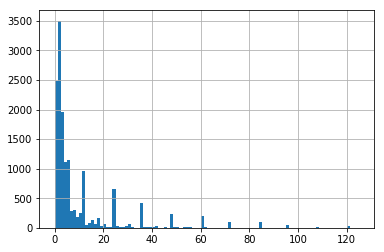

In [20]:
# Age - distribution check

train['Age'].hist(bins=100, range=(0, 125));

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


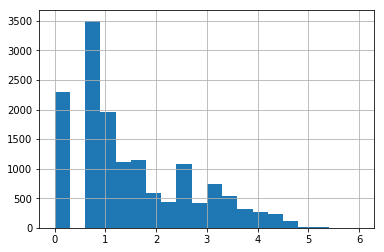

In [21]:
# Age - log transform

train['Age_log'] = np.log(train['Age'])
train['Age_log'].hist(bins=20, range=(0, 6));

In [22]:
# Type - check cat vs. dog

train['Type'].value_counts()

1    8132
2    6861
Name: Type, dtype: int64

In [23]:
# Type - create dummies for cats and dogs

cat_dog = pd.get_dummies(train['Type'])
cat_dog.head()

,1,2
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0


In [24]:
# Type - merge dummies into dataset

train = pd.concat([train, cat_dog], axis=1)
train.rename(columns={1: 'Dog'}, inplace=True)
train.rename(columns={2: 'Cat'}, inplace=True)

train.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,Age_log,Dog,Cat
0,2,Nibble,3,299,0,1,1,7,0,1,...,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2,1.098612,0,1
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0,0.000000,0,1
2,1,Brisco,1,307,0,1,2,7,0,2,...,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3,0.000000,1,0
3,1,Miko,4,307,0,2,1,2,0,2,...,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2,1.386294,1,0
4,1,Hunter,1,307,0,1,1,0,0,2,...,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2,0.000000,1,0


In [25]:
# Gender assessment for mixed (3) if group of pets

train['Gender'].value_counts()

2    7277
1    5536
3    2180
Name: Gender, dtype: int64

In [26]:
# Creating gender dummies

gender = pd.get_dummies(train['Gender'])
gender.head()

,1,2,3
0,1,0,0
1,1,0,0
2,1,0,0
3,0,1,0
4,1,0,0


In [27]:
# Merging gender dummies into dataset

train = pd.concat([train, gender], axis=1)
train.rename(columns={1: 'Male'}, inplace=True)
train.rename(columns={2: 'Female'}, inplace=True)
train.rename(columns={3: 'Mixed Gender (Group)'}, inplace=True)

train.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Description,PetID,PhotoAmt,AdoptionSpeed,Age_log,Dog,Cat,Male,Female,Mixed Gender (Group)
0,2,Nibble,3,299,0,1,1,7,0,1,...,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2,1.098612,0,1,1,0,0
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,I just found it alone yesterday near my apartm...,6296e909a,2.0,0,0.000000,0,1,1,0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3,0.000000,1,0,1,0,0
3,1,Miko,4,307,0,2,1,2,0,2,...,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2,1.386294,1,0,0,1,0
4,1,Hunter,1,307,0,1,1,0,0,2,...,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2,0.000000,1,0,1,0,0


In [28]:
# Maturity cleanup

# MaturitySize - Size at maturity (1 = Small, 2 = Medium, 3 = Large, 4 = Extra Large, 0 = Not Specified)

train['MaturitySize'] = train['MaturitySize'].replace(0, np.nan, inplace=False)
train['MaturitySize'].value_counts()

2    10305
1     3395
3     1260
4       33
Name: MaturitySize, dtype: int64

In [29]:
# Fur length cleanup

# FurLength - Fur length (1 = Short, 2 = Medium, 3 = Long, 0 = Not Specified)

train['FurLength'] = train['FurLength'].replace(0, np.nan, inplace=False)
train['FurLength'].value_counts()

1    8808
2    5361
3     824
Name: FurLength, dtype: int64

In [30]:
# Creating vaccinated dummies for yes/no data (answer 3 was "not sure")

train['Vaccinated'] = train['Vaccinated'].replace(3, np.nan, inplace=False)
vaccinated_dummies = pd.get_dummies(train['Vaccinated'])
vaccinated_dummies.head()

,1.0,2.0
0,0,1
1,0,0
2,1,0
3,1,0
4,0,1


In [31]:
# Merging vaccinated dummies into dataset

train = pd.concat([train, vaccinated_dummies], axis=1)
train.rename(columns={1: 'Vaccinated'}, inplace=True)
train.rename(columns={2: 'Not vaccinated'}, inplace=True)

train.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,PhotoAmt,AdoptionSpeed,Age_log,Dog,Cat,Male,Female,Mixed Gender (Group),Vaccinated,Not vaccinated
0,2,Nibble,3,299,0,1,1,7,0,1,...,1.0,2,1.098612,0,1,1,0,0,0,1
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,2.0,0,0.000000,0,1,1,0,0,0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,7.0,3,0.000000,1,0,1,0,0,1,0
3,1,Miko,4,307,0,2,1,2,0,2,...,8.0,2,1.386294,1,0,0,1,0,1,0
4,1,Hunter,1,307,0,1,1,0,0,2,...,3.0,2,0.000000,1,0,1,0,0,0,1


In [32]:
# Creating dewormed dummies for yes/no data (answer 3 was "not sure")

train['Dewormed'] = train['Dewormed'].replace(3, np.nan, inplace=False)
dewormed_dummies = pd.get_dummies(train['Dewormed'])
dewormed_dummies.head()

,1.0,2.0
0,0,1
1,0,0
2,1,0
3,1,0
4,0,1


In [33]:
# Merging dewormed dummies into dataset

train = pd.concat([train, dewormed_dummies], axis=1)
train.rename(columns={1: 'Dewormed'}, inplace=True)
train.rename(columns={2: 'Not dewormed'}, inplace=True)

train.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Age_log,Dog,Cat,Male,Female,Mixed Gender (Group),Vaccinated,Not vaccinated,Dewormed,Not dewormed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1.098612,0,1,1,0,0,0,1,0,1
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,0.000000,0,1,1,0,0,0,0,0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,0.000000,1,0,1,0,0,1,0,1,0
3,1,Miko,4,307,0,2,1,2,0,2,...,1.386294,1,0,0,1,0,1,0,1,0
4,1,Hunter,1,307,0,1,1,0,0,2,...,0.000000,1,0,1,0,0,0,1,0,1


In [34]:
# Creating sterilized dummies for yes/no data (answer 3 was "not sure")

train['Sterilized'] = train['Sterilized'].replace(3, np.nan, inplace=False)
sterilized_dummies = pd.get_dummies(train['Sterilized'])
sterilized_dummies.head()

,1.0,2.0
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [35]:
# Merging sterilized dummies into dataset

train = pd.concat([train, sterilized_dummies], axis=1)
train.rename(columns={1: 'Sterilized'}, inplace=True)
train.rename(columns={2: 'Not sterilized'}, inplace=True)

train.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Cat,Male,Female,Mixed Gender (Group),Vaccinated,Not vaccinated,Dewormed,Not dewormed,Sterilized,Not sterilized
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,0,0,0,1,0,1,0,1
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,0,0,0,0,0,0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,0,1,0,0,1,0,1,0,0,1
3,1,Miko,4,307,0,2,1,2,0,2,...,0,0,1,0,1,0,1,0,0,1
4,1,Hunter,1,307,0,1,1,0,0,2,...,0,1,0,0,0,1,0,1,0,1


In [36]:
# Create health dummies (instead of cleanup)

# Health Condition (1 = Healthy, 2 = Minor Injury, 3 = Serious Injury, 0 = Not Specified)

train['Health'] = train['Health'].replace(0, np.nan, inplace=False)
health_dummies = pd.get_dummies(train['Health'])
health_dummies.head()

,1,2,3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [37]:
# Merging health dummies into dataset

train = pd.concat([train, health_dummies], axis=1)
train.rename(columns={1: 'Healthy'}, inplace=True)
train.rename(columns={2: 'Minor Injury'}, inplace=True)
train.rename(columns={3: 'Serious Injury'}, inplace=True)

train.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Mixed Gender (Group),Vaccinated,Not vaccinated,Dewormed,Not dewormed,Sterilized,Not sterilized,Healthy,Minor Injury,Serious Injury
0,2,Nibble,3,299,0,1,1,7,0,1,...,0,0,1,0,1,0,1,1,0,0
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,0,0,0,0,0,0,0,1,0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,0,1,0,1,0,0,1,1,0,0
3,1,Miko,4,307,0,2,1,2,0,2,...,0,1,0,1,0,0,1,1,0,0
4,1,Hunter,1,307,0,1,1,0,0,2,...,0,0,1,0,1,0,1,1,0,0


In [38]:
# Quantity distribution check

train['Quantity'].value_counts()

1     11565
2      1422
3       726
4       531
5       333
6       185
7        84
8        52
9        33
10       19
20       12
11       10
12        6
15        4
17        3
16        3
13        2
14        2
18        1
Name: Quantity, dtype: int64

In [39]:
# Creating "single" variables

train['Single_pic'] = np.where(train['Quantity']==1, 1, 0)
train['Single_pic'].value_counts()

1    11565
0     3428
Name: Single_pic, dtype: int64

In [40]:
# Creating "group" variable

train['Group_pic'] = np.where(train['Quantity']>1, 1, 0)
train['Group_pic'].value_counts()

0    11565
1     3428
Name: Group_pic, dtype: int64

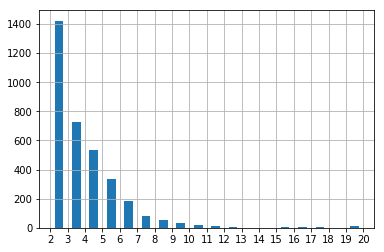

In [41]:
# Creating group quantity variable (tried log transforming this one without big effect, so skipped)

train['Group_size'] = train['Quantity'].replace(1, np.nan, inplace=False)
train['Group_size'].hist(bins=18, rwidth=0.5)
plt.xticks(np.arange(2, 21, step=1));

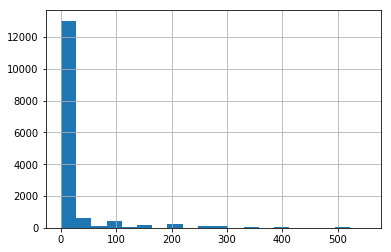

In [42]:
# Fee distribution check

# Fee - Adoption fee (0 = Free)

train['Fee'].hist(bins=20, range=(0, 550));

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


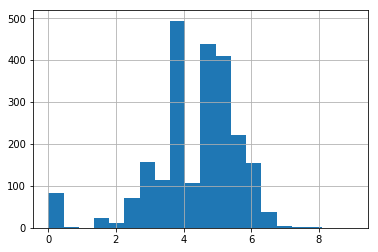

In [43]:
train['Fee_log'] = np.log(train['Fee'])
train['Fee_log'].hist(bins=20, range=(0, 9));

#### Colors dummy code



In [44]:
# Dominant color dummies creation

color_dummies = pd.get_dummies(train['Color1'])
color_dummies.head()

,1,2,3,4,5,6,7
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0


In [45]:
# Color label check

color_labels.head(7)

,ColorID,ColorName
0,1,Black
1,2,Brown
2,3,Golden
3,4,Yellow
4,5,Cream
5,6,Gray
6,7,White


In [46]:
# Dominant color column name cleanup

train = pd.concat([train, color_dummies], axis=1)
train.rename(columns={1: 'Black'}, inplace=True)
train.rename(columns={2: 'Brown'}, inplace=True)
train.rename(columns={3: 'Golden'}, inplace=True)
train.rename(columns={4: 'Yellow'}, inplace=True)
train.rename(columns={5: 'Cream'}, inplace=True)
train.rename(columns={6: 'Gray'}, inplace=True)
train.rename(columns={7: 'White'}, inplace=True)

train.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Group_pic,Group_size,Fee_log,Black,Brown,Golden,Yellow,Cream,Gray,White
0,2,Nibble,3,299,0,1,1,7,0,1,...,0,NaN,4.605170,1,0,0,0,0,0,0
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,0,NaN,-inf,1,0,0,0,0,0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,0,NaN,-inf,0,1,0,0,0,0,0
3,1,Miko,4,307,0,2,1,2,0,2,...,0,NaN,5.010635,1,0,0,0,0,0,0
4,1,Hunter,1,307,0,1,1,0,0,2,...,0,NaN,-inf,1,0,0,0,0,0,0


In [47]:
# Color counter variable

# Replacing zeros with nan

train['Color2'] = train['Color2'].replace(0, np.nan, inplace=False)
train['Color3'] = train['Color2'].replace(0, np.nan, inplace=False)

train['Color_number'] = train[['Color1', 'Color2', 'Color3']].count(axis='columns')
train.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Group_size,Fee_log,Black,Brown,Golden,Yellow,Cream,Gray,White,Color_number
0,2,Nibble,3,299,0,1,1,7.0,7.0,1,...,NaN,4.605170,1,0,0,0,0,0,0,3
1,2,No Name Yet,1,265,0,1,1,2.0,2.0,2,...,NaN,-inf,1,0,0,0,0,0,0,3
2,1,Brisco,1,307,0,1,2,7.0,7.0,2,...,NaN,-inf,0,1,0,0,0,0,0,3
3,1,Miko,4,307,0,2,1,2.0,2.0,2,...,NaN,5.010635,1,0,0,0,0,0,0,3
4,1,Hunter,1,307,0,1,1,NaN,NaN,2,...,NaN,-inf,1,0,0,0,0,0,0,1


In [48]:
train['Color_number'].value_counts()

3    10522
1     4471
Name: Color_number, dtype: int64

#### States dummy code

In [49]:
# States dummies creation

state_dummies = pd.get_dummies(train['State'])
state_dummies.head()

,41324,41325,41326,41327,41330,41332,41335,41336,41342,41345,41361,41367,41401,41415
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [50]:
# States label check

state_labels.head(15)

,StateID,StateName
0,41336,Johor
1,41325,Kedah
2,41367,Kelantan
3,41401,Kuala Lumpur
4,41415,Labuan
5,41324,Melaka
6,41332,Negeri Sembilan
7,41335,Pahang
8,41330,Perak
9,41380,Perlis


In [51]:
# States column name cleanup

train = pd.concat([train, state_dummies], axis=1)
train.rename(columns={41336: 'Johor'}, inplace=True)
train.rename(columns={41325: 'Kedah'}, inplace=True)
train.rename(columns={41367: 'Kelantan'}, inplace=True)
train.rename(columns={41401: 'Kuala Lumpur'}, inplace=True)
train.rename(columns={41415: 'Labuan'}, inplace=True)
train.rename(columns={41324: 'Melaka'}, inplace=True)
train.rename(columns={41332: 'Negeri Sembilan'}, inplace=True)
train.rename(columns={41335: 'Pahang'}, inplace=True)
train.rename(columns={41330: 'Perak'}, inplace=True)
train.rename(columns={41380: 'Perlis'}, inplace=True)
train.rename(columns={41327: 'Pulau Pinang'}, inplace=True)
train.rename(columns={41345: 'Sabah'}, inplace=True)
train.rename(columns={41342: 'Sarawak'}, inplace=True)
train.rename(columns={41326: 'Selangor'}, inplace=True)
train.rename(columns={41361: 'Terengganu'}, inplace=True)

train.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Perak,Negeri Sembilan,Pahang,Johor,Sarawak,Sabah,Terengganu,Kelantan,Kuala Lumpur,Labuan
0,2,Nibble,3,299,0,1,1,7.0,7.0,1,...,0,0,0,0,0,0,0,0,0,0
1,2,No Name Yet,1,265,0,1,1,2.0,2.0,2,...,0,0,0,0,0,0,0,0,1,0
2,1,Brisco,1,307,0,1,2,7.0,7.0,2,...,0,0,0,0,0,0,0,0,0,0
3,1,Miko,4,307,0,2,1,2.0,2.0,2,...,0,0,0,0,0,0,0,0,1,0
4,1,Hunter,1,307,0,1,1,NaN,NaN,2,...,0,0,0,0,0,0,0,0,0,0


#### Breeds dummy code

In [52]:
# Breeds 80/20 tail-end cutoff detection

train['Breedcount'] = train.groupby('Breed1')['Breed1'].transform('count')
train['Breedcount'].quantile(0.2)

205.0

In [53]:
train['Breeds'] = train['Breedcount']
train['Breeds'] = train['Breeds'].where(train['Breeds'].between(205,10000), np.nan, inplace=False)
train['Breeds'].value_counts()

5927.0    5927
3634.0    3634
1258.0    1258
342.0      342
296.0      296
264.0      264
221.0      221
205.0      205
Name: Breeds, dtype: int64

In [54]:
train['Breed1'].loc[train['Breeds'] == 5927].value_counts()

307    5927
Name: Breed1, dtype: int64

In [55]:
breed_labels.loc[breed_labels['BreedID'] == 307]

,BreedID,Type,BreedName
240,307,1,Mixed Breed


In [56]:
train['Breed1'].loc[train['Breeds'] == 3634].value_counts()

266    3634
Name: Breed1, dtype: int64

In [57]:
breed_labels.loc[breed_labels['BreedID'] == 266]

,BreedID,Type,BreedName
266,266,2,Domestic Short Hair


In [58]:
train['Breed1'].loc[train['Breeds'] == 1258].value_counts()

265    1258
Name: Breed1, dtype: int64

In [59]:
breed_labels.loc[breed_labels['BreedID'] == 265]

,BreedID,Type,BreedName
265,265,2,Domestic Medium Hair


In [60]:
train['Breed1'].loc[train['Breeds'] == 342].value_counts()

299    342
Name: Breed1, dtype: int64

In [61]:
breed_labels.loc[breed_labels['BreedID'] == 299]

,BreedID,Type,BreedName
299,299,2,Tabby


In [62]:
train['Breed1'].loc[train['Breeds'] == 296].value_counts()

264    296
Name: Breed1, dtype: int64

In [63]:
breed_labels.loc[breed_labels['BreedID'] == 264]

,BreedID,Type,BreedName
264,264,2,Domestic Long Hair


In [64]:
train['Breed1'].loc[train['Breeds'] == 264].value_counts()

292    264
Name: Breed1, dtype: int64

In [65]:
breed_labels.loc[breed_labels['BreedID'] == 292]

,BreedID,Type,BreedName
292,292,2,Siamese


In [66]:
train['Breed1'].loc[train['Breeds'] == 221].value_counts()

285    221
Name: Breed1, dtype: int64

In [67]:
breed_labels.loc[breed_labels['BreedID'] == 285]

,BreedID,Type,BreedName
285,285,2,Persian


In [68]:
train['Breed1'].loc[train['Breeds'] == 205].value_counts()

141    205
Name: Breed1, dtype: int64

In [69]:
breed_labels.loc[breed_labels['BreedID'] == 141]

,BreedID,Type,BreedName
140,141,1,Labrador Retriever


In [70]:
breed_labels.head()

,BreedID,Type,BreedName
0,1,1,Affenpinscher
1,2,1,Afghan Hound
2,3,1,Airedale Terrier
3,4,1,Akbash
4,5,1,Akita


In [71]:
# Breeds dummy code

breeds_dummies = pd.get_dummies(train['Breeds'])
breeds_dummies.head()

,205.0,221.0,264.0,296.0,342.0,1258.0,3634.0,5927.0
0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,1


In [72]:
# Merging breeds into train data

train = pd.concat([train, breeds_dummies], axis=1)
train.rename(columns={0: 'Breed Not Classified'}, inplace=True)
train.rename(columns={205: 'Labrador Retriever'}, inplace=True)
train.rename(columns={221: 'Persian'}, inplace=True)
train.rename(columns={264: 'Siamese'}, inplace=True)
train.rename(columns={296: 'Domestic Long Hair'}, inplace=True)
train.rename(columns={342: 'Tabby'}, inplace=True)
train.rename(columns={1258: 'Domestic Medium Hair'}, inplace=True)
train.rename(columns={3634: 'Domestic Short Hair'}, inplace=True)
train.rename(columns={5927: 'Mixed Breed'}, inplace=True)

train.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Breedcount,Breeds,Labrador Retriever,Persian,Siamese,Domestic Long Hair,Tabby,Domestic Medium Hair,Domestic Short Hair,Mixed Breed
0,2,Nibble,3,299,0,1,1,7.0,7.0,1,...,342,342.0,0,0,0,0,1,0,0,0
1,2,No Name Yet,1,265,0,1,1,2.0,2.0,2,...,1258,1258.0,0,0,0,0,0,1,0,0
2,1,Brisco,1,307,0,1,2,7.0,7.0,2,...,5927,5927.0,0,0,0,0,0,0,0,1
3,1,Miko,4,307,0,2,1,2.0,2.0,2,...,5927,5927.0,0,0,0,0,0,0,0,1
4,1,Hunter,1,307,0,1,1,NaN,NaN,2,...,5927,5927.0,0,0,0,0,0,0,0,1


In [73]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 75 columns):
Type                    14993 non-null int64
Name                    13736 non-null object
Age                     14993 non-null int64
Breed1                  14993 non-null int64
Breed2                  14993 non-null int64
Gender                  14993 non-null int64
Color1                  14993 non-null int64
Color2                  10522 non-null float64
Color3                  10522 non-null float64
MaturitySize            14993 non-null int64
FurLength               14993 non-null int64
Vaccinated              13125 non-null float64
Dewormed                13212 non-null float64
Sterilized              13178 non-null float64
Health                  14993 non-null int64
Quantity                14993 non-null int64
Fee                     14993 non-null int64
State                   14993 non-null int64
RescuerID               14993 non-null object
VideoAmt                

### Sentiment data

Things to try with the json annotation:
- Document sentiment magnitude and score: create pandas dataframe which includes this information
- Merge the analysis results to respective petID

In [201]:
# https://stackoverflow.com/questions/10377998/how-can-i-iterate-over-files-in-a-given-directory

import json

sentiment_data = pd.DataFrame(columns=['PetID', 'Docsenti_magnitude', 'Docsenti_score'])

directory = 'train_sentiment/'

for filename in os.listdir(directory):
    f = open(directory+filename, 'r')        
    PetID = filename[:-5]
    content = json.load(f)
    magnitude = content['documentSentiment']['magnitude']
    score = content['documentSentiment']['score']
    sentiment_data = sentiment_data.append(pd.Series([PetID, magnitude, score], index=sentiment_data.columns), 
                                           ignore_index=True)
    #print (PetID, magnitude, score)

sentiment_data.head()

,PetID,Docsenti_magnitude,Docsenti_score
0,b5e7e4539,0.5,0
1,41e824cbe,8.3,0.2
2,0833744e6,2.9,0.3
3,fc229a9d7,1.7,0.4
4,3589a8a0d,0.9,0.9


### Images
Data might be relevant to be combined into dataframe later on. Therefore, images need to be converted into numbers.

In [ ]:
# Bringing the images into format 244 * 244
from keras.preprocessing import image                  
from tqdm import tqdm

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

In [ ]:
# Pre-processing the data for keras incl. scaling down by 255
from PIL import ImageFile                            
ImageFile.LOAD_TRUNCATED_IMAGES = True                 

# Anchoring the paths
train_files = 'train_images'
test_files = 'test_images'


# Pre-process the data for Keras
train_tensors = paths_to_tensor(train_files).astype('float32')/255
test_tensors = paths_to_tensor(test_files).astype('float32')/255

### Image metadata

Things to try with the json annotation:
- Park this one for now, could use to confirm e.g. types (cat/dog), but you already have that annotation

## Dataset merger, final dataset and normalization

### Training dataset

In [36]:
# Selecting the relevant columns for the final dataset incl. PetID and all dummies

pet_datafields = 

In [203]:
# Merging sentiment data into dataset

pet_data_nonimg = pet_datafields.merge(sentiment_data, how='outer', on='PetID')

pet_data_nonimg.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Labrador Retriever,Persian,Siamese,Domestic Long Hair,Tabby,Domestic Medium Hair,Domestic Short Hair,Mixed Breed,Docsenti_magnitude,Docsenti_score
0,2,Nibble,3,299,0,1,1,7.0,7.0,1,...,0,0,0,0,1,0,0,0,2.4,0.3
1,2,No Name Yet,1,265,0,1,1,2.0,2.0,2,...,0,0,0,0,0,1,0,0,0.7,-0.2
2,1,Brisco,1,307,0,1,2,7.0,7.0,2,...,0,0,0,0,0,0,0,1,3.7,0.2
3,1,Miko,4,307,0,2,1,2.0,2.0,2,...,0,0,0,0,0,0,0,1,0.9,0.9
4,1,Hunter,1,307,0,1,1,NaN,NaN,2,...,0,0,0,0,0,0,0,1,3.7,0.6


In [ ]:
# Now you need to merge tensor into dataframe

In [ ]:
# Now you need to normalize the data

## Score function

Submissions are scored based on the quadratic weighted kappa, which measures the agreement between two ratings. This 

metric typically varies from 0 (random agreement between raters) to 1 (complete agreement between raters). In the event that there is less agreement between the raters than expected by chance, the metric may go below 0. The quadratic weighted kappa is calculated between the scores which are expected/known and the predicted scores.

Results have 5 possible ratings, 0,1,2,3,4.  The quadratic weighted kappa is calculated as follows. First, an N x N histogram matrix O is constructed, such that Oi,j corresponds to the number of adoption records that have a rating of i (actual) and received a predicted rating j. An N-by-N matrix of weights, w, is calculated based on the difference between actual and predicted rating scores:

See kaggle for formula: https://www.kaggle.com/c/petfinder-adoption-prediction#evaluation

An N-by-N histogram matrix of expected ratings, E, is calculated, assuming that there is no correlation between rating scores.  This is calculated as the outer product between the actual rating's histogram vector of ratings and the predicted rating's histogram vector of ratings, normalized such that E and O have the same sum.

From these three matrices, the quadratic weighted kappa is calculated as: 

See kaggle for formula: https://www.kaggle.com/c/petfinder-adoption-prediction#evaluation


**To be commented**

## Train test split

We can create a train test split on the training data before we can expose our model to the test dataset at first place. The train dataset includes a little less than 15,000 rows, the given test dataset about 3,950 rows.

For the first try, the train set will be split into 11,000 randomized training rows and 4,000 test rows. The models will be trained on this data before checking their performance against the given test set. For simplicity, the artificial test set will be referred to as "train_test". Implementation will be along one comprehensive dataframe. 

First, this will be tried without bringing all image data in. 

Second, image data will be connected to the dataframe to improve classification results.

**This is subject to change based on iterations.**

In [ ]:
# Splitting data

train_size = 11000
train, train_test = pet_data[0:train_size], pet_data[train_size:len(pet_data['PetID'])]

print('Observations: %d' % (len(pet_data)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(train_test)))

In [ ]:
# Finding out the last date for market
train.tail()

## Develop the model

Following classifier models will be tried for this project: 
- https://scikit-learn.org/stable/modules/sgd.html#classification
- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
- https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier
- https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC
- https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html#sklearn.ensemble.BaggingClassifier
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier
- https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/

### *Also check these with keras and/or tensorflow in background*

**Hint for later: check to keep only the full minus one dummies per original variable**

In [ ]:
# Check that you take out irrelevant dummies /multicollinearity causes